# Homework 3
## Package Import and Data Processing

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics, model_selection, tree, ensemble, calibration
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, 1:]
Y = df['Diabetes']

## Question 1
*Build a logistic regression model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?*

In [14]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

log = sklearn.linear_model.LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
log.fit(X_train, Y_train)
Y_pred_proba = log.predict_proba(X_val)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_log = metrics.auc(fpr, tpr)
print('{:72s}{:.5f}'.format('AUC of logistic regression model with all predictors is: ', auc_log))

for i in range(len(X.columns)):
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    log = sklearn.linear_model.LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
    log.fit(X_train_new, Y_train)
    Y_pred_proba = log.predict_proba(X_val_new)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
    auc_log = metrics.auc(fpr, tpr)
    print('{:72s}{:.5f}'.format('AUC of logistic regression model with {} dropped is: '.format(X_train.columns[i]), auc_log))

AUC of logistic regression model with all predictors is:                0.81972
AUC of logistic regression model with HighBP dropped is:                0.81173
AUC of logistic regression model with HighChol dropped is:              0.81512
AUC of logistic regression model with BMI dropped is:                   0.80402
AUC of logistic regression model with Smoker dropped is:                0.81972
AUC of logistic regression model with Stroke dropped is:                0.81960
AUC of logistic regression model with Myocardial dropped is:            0.81884
AUC of logistic regression model with PhysActivity dropped is:          0.81973
AUC of logistic regression model with Fruit dropped is:                 0.81973
AUC of logistic regression model with Vegetables dropped is:            0.81968
AUC of logistic regression model with HeavyDrinker dropped is:          0.81835
AUC of logistic regression model with HasHealthcare dropped is:         0.81967
AUC of logistic regression model with No

* In the code, I first split data into train and test set and use train set to build a logistic regression model with all predictors included. Then I find the AUC of this model. Then I build models with each predictor dropped and find their AUC accordingly.
* The question requires me to find the best predictor of diabetes and the AUC of this model. One way to find the best predictor is to drop each predictors and see which drop drops the model performance the most. As AUC is a factor evaluating the performance of a model, by comparing the change of AUC after each drops could tell me which predictor is the best and the AUC of this model. The more decrease in AUC, the more the model performance is dropped and the better the predictor is.
* The AUC of logistic regression with all predictors is about 0.81972. Excluding predictor, BMI, makes the AUC decreases to 0.80402, which has the highest decrease.
* We could say BMI is the best predictor in logistic regression, since excluding it will drop the model performance the most.

## Question 2
*Build a SVM. Doing so: What is the best predictor of diabetes and what is the AUC of this model?*

In [124]:
C = 1/(2**np.arange(0, 10))
k = 10
cv_scores = np.zeros(len(C))
split = model_selection.KFold(k)
for i in range(len(C)):
    sv = sklearn.svm.LinearSVC(C = C[i], dual = False)
    cv_scores[i] = np.mean(model_selection.cross_val_score(sv, X_train, Y_train, cv = split))
    print('{:16s}{:.10f}   {:10s}{:.10f}'.format('Slack variable: ', C[i], "CV score: ", cv_scores[i]))

Slack variable: 1.0000000000   CV score: 0.8631627730
Slack variable: 0.5000000000   CV score: 0.8631852981
Slack variable: 0.2500000000   CV score: 0.8631852987
Slack variable: 0.1250000000   CV score: 0.8631909297
Slack variable: 0.0625000000   CV score: 0.8631627721
Slack variable: 0.0312500000   CV score: 0.8631852984
Slack variable: 0.0156250000   CV score: 0.8631965606
Slack variable: 0.0078125000   CV score: 0.8631233526
Slack variable: 0.0039062500   CV score: 0.8630445139
Slack variable: 0.0019531250   CV score: 0.8629656737


In [15]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

sv = sklearn.svm.LinearSVC(C = 0.015625, dual = False)
sv.fit(X_train, Y_train)
Y_pred = sv.decision_function(X_val)
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred)
auc_svm = metrics.auc(fpr, tpr)
print('{:50s}{:.5f}'.format('AUC of SVM with all predictors is: ', auc_svm))

for i in range(len(X.columns)):
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    sv = sklearn.svm.LinearSVC(C = 0.015625, dual = False)
    sv.fit(X_train_new, Y_train)
    Y_pred = sv.decision_function(X_val_new)
    fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred)
    auc_svm = metrics.auc(fpr, tpr)
    print('{:50s}{:.5f}'.format('AUC of SVM with {} dropped is: '.format(X_train.columns[i]), auc_svm))

AUC of SVM with all predictors is:                0.81757
AUC of SVM with HighBP dropped is:                0.80952
AUC of SVM with HighChol dropped is:              0.81258
AUC of SVM with BMI dropped is:                   0.80321
AUC of SVM with Smoker dropped is:                0.81758
AUC of SVM with Stroke dropped is:                0.81742
AUC of SVM with Myocardial dropped is:            0.81716
AUC of SVM with PhysActivity dropped is:          0.81755
AUC of SVM with Fruit dropped is:                 0.81756
AUC of SVM with Vegetables dropped is:            0.81759
AUC of SVM with HeavyDrinker dropped is:          0.81604
AUC of SVM with HasHealthcare dropped is:         0.81749
AUC of SVM with NotAbleToAffordDoctor dropped is: 0.81764
AUC of SVM with GeneralHealth dropped is:         0.80265
AUC of SVM with MentalHealth dropped is:          0.81751
AUC of SVM with PhysicalHealth dropped is:        0.81751
AUC of SVM with HardToClimbStairs dropped is:     0.81744
AUC of SVM wit

* In the first portion of the code, I choose ten different slack variables and use them to evaluate different model performance with different slack variables. In the second portion of the code, I first split data into train and test set and use train set to build a support vector machine model with all predictors included. Then I find the AUC of this model. Then I build models with each predictor dropped and find their AUC accordingly.
* First, the dataset is not linearly separable, and we need a slack variable to have a soft margin for the support vector machine. Therefore, I test different models' performance with different slack variables, and choose to use the slack variable that has the best model performance. The question requires me to find the best predictor of diabetes and the AUC of this model. One way to find the best predictor is to drop each predictors and see which drop drops the model performance the most. As AUC is a factor evaluating the performance of a model, by comparing the change of AUC after each drops could tell me which predictor is the best and the AUC of this model. The more decrease in AUC, the more the model performance is dropped and the better the predictor is.
* The AUC of support vector machine with all predictors is about 0.81757. Excluding predictor, GeneralHealth, makes the AUC decreases to 0.80321, which has the highest decrease.
* We could say GeneralHealth is the best predictor in support vector machine, since excluding it will drop the model performance the most.

## Question 3
*Use a single, individual decision tree. Doing so: What is the best predictor of diabetes and what is the AUC of this model?*

In [43]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3, random_state = 981)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

sdt = tree.DecisionTreeClassifier(criterion='gini')
sdt.fit(X_train, Y_train)
Y_pred_proba = sdt.predict_proba(X_val)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_decision_tree = metrics.auc(fpr, tpr)
print('{:67s}{:.5f}'.format('AUC of single decision tree with all predictors (without limiting max_dept) is: '.format(X_train.columns[i]), auc_decision_tree))

AUC of single decision tree with all predictors (without limiting max_dept) is: 0.59845


In [49]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3, random_state = 981)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

sdt = tree.DecisionTreeClassifier(max_depth = 10, criterion='gini')
sdt.fit(X_train, Y_train)
Y_pred_proba = sdt.predict_proba(X_val)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_decision_tree = metrics.auc(fpr, tpr)
print('{:67s}{:.5f}'.format('AUC of single decision tree with all predictors is: '.format(X_train.columns[i]), auc_decision_tree))

for i in range(len(X.columns)):
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    sdt = tree.DecisionTreeClassifier(max_depth = 10, criterion='gini')
    sdt.fit(X_train_new, Y_train)
    Y_pred_proba = sdt.predict_proba(X_val_new)[:,1]   
    fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
    auc_decision_tree = metrics.auc(fpr, tpr)
    print('{:67s}{:.5f}'.format('AUC of single decision tree with {} dropped is: '.format(X_train.columns[i]), auc_decision_tree))

AUC of single decision tree with all predictors is:                0.81039
AUC of single decision tree with HighBP dropped is:                0.80320
AUC of single decision tree with HighChol dropped is:              0.80462
AUC of single decision tree with BMI dropped is:                   0.79906
AUC of single decision tree with Smoker dropped is:                0.81149
AUC of single decision tree with Stroke dropped is:                0.81181
AUC of single decision tree with Myocardial dropped is:            0.81061
AUC of single decision tree with PhysActivity dropped is:          0.81069
AUC of single decision tree with Fruit dropped is:                 0.81080
AUC of single decision tree with Vegetables dropped is:            0.81116
AUC of single decision tree with HeavyDrinker dropped is:          0.81006
AUC of single decision tree with HasHealthcare dropped is:         0.81072
AUC of single decision tree with NotAbleToAffordDoctor dropped is: 0.81106
AUC of single decision tr

* In the first portion of the code, I build a single decision tree model without limiting the maximum depth. In the second portion of the code, I first split data into train and test set and use train set to build a single decision tree model with max_depth = 10 and all predictors included. Then I find the AUC of this model. Then I build models with each predictor dropped and find their AUC accordingly.
* The question requires me to find the best predictor of diabetes and the AUC of this model. One way to find the best predictor is to drop each predictors and see which drop drops the model performance the most. As AUC is a factor evaluating the performance of a model, by comparing the change of AUC after each drops could tell me which predictor is the best and the AUC of this model. The more decrease in AUC, the more the model performance is dropped and the better the predictor is.
* For the model without limiting the maximum depth, the AUC is round 0.59845. For the model with max_depth = 10, the AUC of single decision tree with all predictors is about 0.81035. Excluding predictor, GeneralHealth, makes the AUC decreases to 0.79193, which has the highest decrease.
* By limited the max_depth, we make the model perform better. If we did not limit the max_depth, then nodes are expanded until all leaves are pure. This might cause overfitting: when a classification is applied in the model, the result will fall into a pure leaf and the result returned by predict_proba will be either 0 or 1; if the max_depth is limited, the result will fall into an impure leaf and the result returned by predict_proba will be either 0 or the probability. We could say GeneralHealth is the best predictor in single decision tree, since excluding it will drop the model performance the most.

## Question 4
*Build a random forest model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?*

In [42]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3, random_state = 981)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

rf = ensemble.RandomForestClassifier(n_estimators = 200, max_samples = 1.0, max_features = 0.2, bootstrap = True, criterion='gini')
rf.fit(X_train, Y_train)
Y_pred_proba = rf.predict_proba(X_val)[:,1]
auc_random_forest = metrics.roc_auc_score(Y_val, Y_pred_proba)
print('{:67s}{:.5f}'.format('AUC of random forest with all predictors is: ', auc_random_forest))

for i in range(len(X.columns)):
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    rf = ensemble.RandomForestClassifier(n_estimators = 200, max_samples = 1.0, max_features = 0.2, bootstrap = True, criterion='gini')
    rf.fit(X_train_new, Y_train)
    Y_pred_proba = rf.predict_proba(X_val_new)[:,1]
    auc_random_forest = metrics.roc_auc_score(Y_val, Y_pred_proba)
    print('{:67s}{:.5f}'.format('AUC of random forest with {} dropped is: '.format(X_train.columns[i]), auc_random_forest))


AUC of random forest with all predictors is:                       0.81041
AUC of random forest with HighBP dropped is:                       0.80087
AUC of random forest with HighChol dropped is:                     0.80345
AUC of random forest with BMI dropped is:                          0.78064
AUC of random forest with Smoker dropped is:                       0.80826
AUC of random forest with Stroke dropped is:                       0.80967
AUC of random forest with Myocardial dropped is:                   0.80862
AUC of random forest with PhysActivity dropped is:                 0.80873
AUC of random forest with Fruit dropped is:                        0.80819
AUC of random forest with Vegetables dropped is:                   0.80979
AUC of random forest with HeavyDrinker dropped is:                 0.80839
AUC of random forest with HasHealthcare dropped is:                0.80969
AUC of random forest with NotAbleToAffordDoctor dropped is:        0.80943
AUC of random forest with

* In the code, I first split data into train and test set and use train set to build a random forest model with all predictors included. Then I find the AUC of this model. Then I build models with each predictor dropped and find their AUC accordingly.
* The question requires me to find the best predictor of diabetes and the AUC of this model. One way to find the best predictor is to drop each predictors and see which drop drops the model performance the most. As AUC is a factor evaluating the performance of a model, by comparing the change of AUC after each drops could tell me which predictor is the best and the AUC of this model. The more decrease in AUC, the more the model performance is dropped and the better the predictor is.
* The AUC of random forest with all predictors is about 0.81041. Excluding predictor, BMI, makes the AUC decreases to 0.78064, which has the highest decrease.
* We could say BMI is the best predictor in random forest, since excluding it will drop the model performance the most.

## Question 5
*Build a model using adaBoost. Doing so: What is the best predictor of diabetes and what is the AUC of this model?*

In [33]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3, random_state = 981)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

ab = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1)
ab.fit(X_train, Y_train)
Y_pred_proba = ab.predict_proba(X_val)[:,1]
auc_adaBoost = metrics.roc_auc_score(Y_val, Y_pred_proba)
print('{:67s}{:.5f}'.format('AUC of adaboost with all predictor is: ', auc_adaBoost))

for i in range(len(X.columns)):
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    ab = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1)
    ab.fit(X_train_new, Y_train)
    Y_pred_proba = ab.predict_proba(X_val_new)[:,1]
    auc_adaBoost = metrics.roc_auc_score(Y_val, Y_pred_proba)
    print('{:67s}{:.5f}'.format('AUC of adaboost with {} dropped is: '.format(X_train.columns[i]), auc_adaBoost))
    

AUC of adaboost with all predictor is:                             0.82767
AUC of adaboost with HighBP dropped is:                            0.82077
AUC of adaboost with HighChol dropped is:                          0.82328
AUC of adaboost with BMI dropped is:                               0.81017
AUC of adaboost with Smoker dropped is:                            0.82767
AUC of adaboost with Stroke dropped is:                            0.82747
AUC of adaboost with Myocardial dropped is:                        0.82684
AUC of adaboost with PhysActivity dropped is:                      0.82762
AUC of adaboost with Fruit dropped is:                             0.82774
AUC of adaboost with Vegetables dropped is:                        0.82761
AUC of adaboost with HeavyDrinker dropped is:                      0.82640
AUC of adaboost with HasHealthcare dropped is:                     0.82760
AUC of adaboost with NotAbleToAffordDoctor dropped is:             0.82767
AUC of adaboost with Gene

* In the code, I first split data into train and test set and use train set to build a adaBoost model with all predictors included. Then I find the AUC of this model. Then I build models with each predictor dropped and find their AUC accordingly.
* The question requires me to find the best predictor of diabetes and the AUC of this model. One way to find the best predictor is to drop each predictors and see which drop drops the model performance the most. As AUC is a factor evaluating the performance of a model, by comparing the change of AUC after each drops could tell me which predictor is the best and the AUC of this model. The more decrease in AUC, the more the model performance is dropped and the better the predictor is.
* The AUC of adaBoost with all predictors is about 0.82767. Excluding predictor, BMI, makes the AUC decreases to 0.81017, which has the highest decrease.
* We could say BMI is the best predictor in adaBoost, since excluding it will drop the model performance the most.

## Extra 1
*Which of these 5 models is the best to predict diabetes in this dataset?*

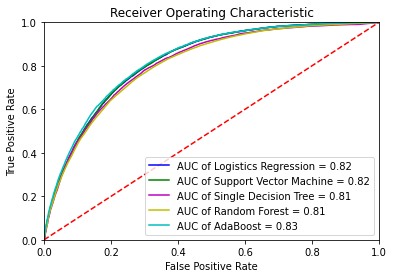

In [50]:
train_data, val_data = model_selection.train_test_split(df, test_size = 0.3, random_state = 981)
X_train = train_data.drop('Diabetes', axis = 1)
X_val  = val_data.drop('Diabetes', axis = 1)
Y_train = train_data['Diabetes']
Y_val  = val_data['Diabetes']

log = sklearn.linear_model.LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
log.fit(X_train, Y_train)
Y_pred_proba = log.predict_proba(X_val)[:,1]
fpr_log, tpr_log, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_log = metrics.auc(fpr_log, tpr_log)

sv = sklearn.svm.LinearSVC(C = 0.1, dual = False)
sv.fit(X_train, Y_train)
Y_pred_proba = sv.decision_function(X_val)
fpr_svm, tpr_svm, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_svm = metrics.auc(fpr_svm, tpr_svm)

sdt = tree.DecisionTreeClassifier(max_depth = 10, criterion='gini')
sdt.fit(X_train, Y_train)
Y_pred_proba = sdt.predict_proba(X_val)[:,1]
fpr_tree, tpr_tree, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_decision_tree = metrics.auc(fpr_tree, tpr_tree)

rf = ensemble.RandomForestClassifier(n_estimators = 100, max_samples = 1.0, max_features = 0.2, bootstrap = True, criterion='gini')
rf.fit(X_train, Y_train)
Y_pred_proba = rf.predict_proba(X_val)[:,1]
fpr_random, tpr_random, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_random = metrics.auc(fpr_random, tpr_random)

ab = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1)
ab.fit(X_train, Y_train)
Y_pred_proba = ab.predict_proba(X_val)[:,1]
fpr_adaBoost, tpr_adaBoost, threshold = metrics.roc_curve(Y_val, Y_pred_proba)
auc_adaBoost = metrics.auc(fpr_adaBoost, tpr_adaBoost)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC of Logistics Regression = %0.2f' % auc_log)
plt.plot(fpr_svm, tpr_svm, 'g', label = 'AUC of Support Vector Machine = %0.2f' % auc_svm)
plt.plot(fpr_tree, tpr_tree, 'm', label = 'AUC of Single Decision Tree = %0.2f' % auc_decision_tree)
plt.plot(fpr_random, tpr_random, 'y', label = 'AUC of Random Forest = %0.2f' % auc_random)
plt.plot(fpr_adaBoost, tpr_adaBoost, 'c', label = 'AUC of AdaBoost = %0.2f' % auc_adaBoost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* In the code, I first split data into train and test set and build five models with all predictors included. Then I plot the AUC curves of each model.
* AUC could be used to evaluate model performance: higher the AUC, the better the model. Therefore, I calculate the AUC of each model and compare them.
* The AUC of logistics regression is about 0.82. The AUC of support vector machine is about 0.82. The AUC of single decision tree is about 0.81. The AUC of random forest is about 0.81. The AUC of adaBoost is about 0.83.
* The AUC of adaBoost is the highest among all models, even though there is no huge differences.


## Extra 2
*Tell us something interesting about this dataset that is not already covered by the
questions above and that is not obvious.*

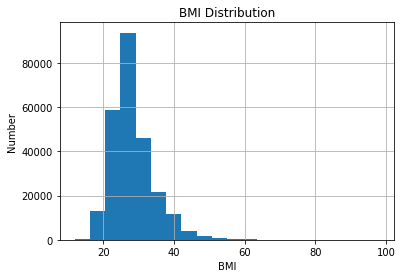

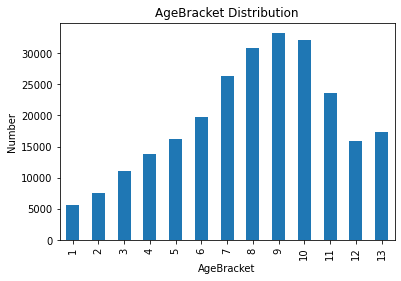

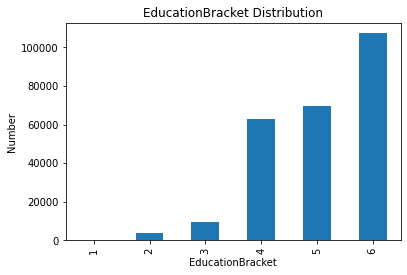

In [92]:
plt.title('BMI Distribution')
X["BMI"].hist(bins = 20)
plt.ylabel('Number')
plt.xlabel('BMI')
plt.show()

plt.title('AgeBracket Distribution')
X["AgeBracket"].value_counts().sort_index().plot.bar()
plt.ylabel('Number')
plt.xlabel('AgeBracket')
plt.show()

plt.title('EducationBracket Distribution')
X["EducationBracket"].value_counts().sort_index().plot.bar()
plt.ylabel('Number')
plt.xlabel('EducationBracket')
plt.show()
plt.show()

* In the code, I plot the distribution of values of three predictors: BMI, AgeBracket, EducationBracket.
* By examining the plot of distribution, we can have some findings of the distribution of values and draw some conclusion toward the previous models.
* For BMI in the dataset, the majority falls between 20-30. For AgeBracket, the distribution is left skewed. For EducationBracket, the distribution is left skewed.
* We could say that the previous models will be more effective coping with data points with BMI value within 20-30, comparatively higher AgeBracket number, and education of GED, some college or college graduate.